In [4]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'cv2'

In [7]:
!pip install opencv-python

In [8]:
import cv2

In [10]:
! pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=2f829f8c9ded8254d16b9a0d75158f91b4196217724421ffa746fb5ef684f302
  Stored in directory: C:\Users\Sindhu Samudrala\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-none-any.whl size=19560 sha256=0bf0eb2fe7e5c2bf2d2fc245ac6c3833f9d52b627f22f3dbf0b4217b8d8e5381
  Stored in directory: C:\Users\Sindhu Samudrala\AppData\Local\pip\Cache\wheels\b1\c2\ed\d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built termcolor wrapt
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:


ERROR: astroid 2.3.1 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.1 has requirement six==1.12, but you'll have six 1.15.0 which is incompatible.
ERROR: astroid 2.3.1 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda\\lib\\site-packages\\__pycache__\\six.cpython-37.pyc'
Consider using the `--user` option or check the permissions.



In [12]:
from tqdm import tqdm

In [14]:
os.getcwd()

'C:\\Users\\Sindhu Samudrala\\Downloads\\plant-pathology'

In [16]:
train_data = pd.read_csv('train.csv')

In [17]:
test_data = pd.read_csv("test.csv")

In [18]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [19]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [20]:
!pip install pillow

In [21]:
from PIL import Image

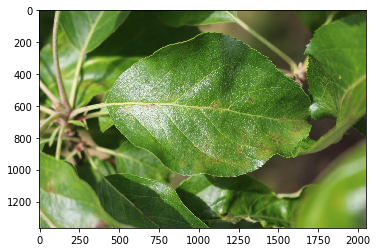

In [23]:
image = Image.open("images/train_256.jpg")
plt.imshow(image)

## Preparing training data

In [25]:
class_names = train_data.loc[:,'healthy':].columns

In [26]:
class_names

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [28]:
count = 0
train_data['label'] = 0
for i in class_names:
    train_data['label'] = train_data['label'] + train_data[i]*count
    count+=1

In [29]:
train_data

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


## function to get labels

In [32]:
def get_label_image(img):
    if search("Train",img):
        label=train_data.loc[train_data['image_id']==img]['label']
        return label

In [34]:
! pip install natsort

In [40]:
from natsort import natsorted

## dividing the images 4 different folders

In [44]:
DIR = r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\images'

In [45]:
DIR

'C:\\Users\\Sindhu Samudrala\\Downloads\\plant-pathology\\images'

In [83]:
TRAIN_SIZE = 1100

In [88]:
import natsort

In [103]:
def create_train_data():
    images = natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label = get_label_image(img)
        path = os.path.join(DIR,img)
        
        if search("Train",img):
            if int(img.split("_")[1].split(".")[0])  and label.item() == 0 :
                shutil.copy(path,r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\healthy')
            elif int(img.split("_")[1].split(".")[0])  and label.item() == 1:
                shutil.copy(path,r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\multiple_diseases')
            elif int(img.split("_")[1].split(".")[0])  and label.item() == 2:
                shutil.copy(path,r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\rust')
            elif int(img.split("_")[1].split(".")[0])  and label.item() == 3:
                shutil.copy(path,r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\scab')
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Test')
                
                

In [91]:
img = 'train_0.jpg'

In [92]:
img.split("_")[1].split('.')[0]

'0'

In [96]:
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train')
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\healthy')
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\multiple_diseases')
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\rust')
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Train\scab')
shutil.os.mkdir(r'C:\Users\Sindhu Samudrala\Downloads\plant-pathology\Test')

In [104]:
train_folders = create_train_data()

 50%|████▉     | 1815/3642 [00:03<00:03, 504.52it/s]C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  
 50%|████▉     | 1815/3642 [00:03<00:04, 454.24it/s]


ValueError: can only convert an array of size 1 to a Python scalar